# ロジスティック回帰

銀行のデータを元にロジスティック回帰を作成します

データはポルトガルの銀行のものであり、顧客が定期預金をするかどうか分類することを目的とします

データの最初の列はインデックスです

## ライブラリのインポート

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## データの読み込み

‘Example_bank_data.csv’を使います

In [5]:
raw_data = pd.read_csv('Example-bank-data.csv')
raw_data

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no
...,...,...,...
513,513,204,no
514,514,806,yes
515,515,290,no
516,516,473,yes


In [6]:
# データのコピーを作成します
data = raw_data.copy()

# インデックスの列を削除します
data = data.drop(['Unnamed: 0'], axis = 1)

# mapメソッドを使い、yesとnoを1と0に変換していきます 
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0
...,...,...
513,204,0
514,806,1
515,290,0
516,473,1


In [7]:
# 記述統計量の確認
data.describe()

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


### 従属変数と独立変数の宣言

In [8]:
y = data['y']
x1 = data['duration']

### ロジスティック回帰

回帰を行い、散布図を作成します

In [9]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

# まとめ表の表示
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 13 Mar 2021   Pseudo R-squ.:                  0.2121
Time:                        11:07:40   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

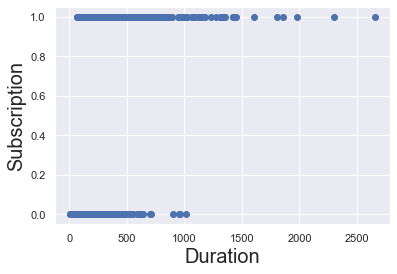

In [10]:
# x1とyの散布図を作成します
plt.scatter(x1,y,color = 'C0')

# 軸に名前を付けます
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()